## Phase 4 (Modeling): Multilayer Perceptron & Grid Search & Schwelle

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 20](https://data-science.training/kapitel-20/)
* Datum: 23.03.2023

Datenversion: 10

Methode: Multilayer Perceptron (MLP)

Optimierung: Ergebnis von Grid Search (GS)

Jetzt mit einer Wahrscheinlichkeits-Schwelle > 50 % für die positiven Prognosen

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf
# Warnungen unterdrücken
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Datenversion festlegen: 10
version  = 10
# Modell-Abkürzung festlegen: mlp = Multilayer Perceptron
shortcut = 'mlp'
# Optimierungsart festlegen: gs = Grid Search
opt      = 'gs'
# Modell-Parameter
#  alpha = 0.0
#  hidden_layer_sizes = 6
#  max_iter = 12
# Schwellenwert festlegen:
#  (1) Runde 1: 0.50, 0.60, 0.70, 0.80, 0.90
#  (2) Runde 2: 0.65, 0.75, 0.85, 0.95
threshold = 0.95

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/new/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Survived)
X = df_train.iloc[:,1:].values
# Klassenattribut (Survived) extrahieren
y = df_train.iloc[:,0].values

In [8]:
# Input-Werte (X) auf Intervall [0, 1] skalieren
#  (KNIME: "Normalizer (PMML)")
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [10]:
# Multilayer Perzeptron Methode auswählen
# {'alpha': 0.0, 'hidden_layer_sizes': 6, 'max_iter': 12}
#  (KNIME: "XYZ Learner")
model = MLPClassifier(activation='logistic', solver='lbfgs', alpha=0.0, hidden_layer_sizes=6, max_iter=12, random_state=0)
print(model.get_params())

{'activation': 'logistic', 'alpha': 0.0, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 12, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [11]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores_threshold(model, X, y, cv=skf, threshold=threshold)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 548
* TP (True  Positives) : 47
* FN (False Negatives) : 295
* FP (False Positives) : 1

Gütemaße

* Genauigkeit  (Accuracy)    :   66,77 %
* Spezifität   (Specificity) :   99,82 %
* Sensitivität (Sensitivity) :   13,67 %
* Präzision    (Precision)   :   88,75 %
* Recall       (Recall)      :   13,67 %
* F-Maß        (F Score)     :   22,93 %
* AURC         (AURC)        :   85,29 %
* LogLoss      (LogLoss)     :    0,442

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  65,94 %


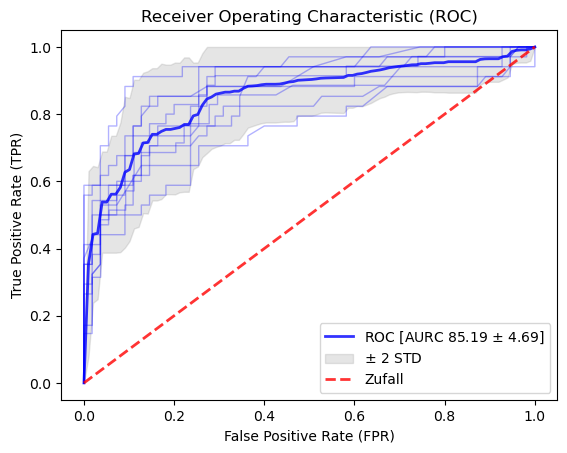

In [12]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X, y, cv=skf)

In [13]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.0, hidden_layer_sizes=6,
              max_iter=12, random_state=0, solver='lbfgs')

In [14]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/new/' + shortcut + '_v' + str(version) + '_' + opt + '_thr_' + str(threshold)
pk.dump(model, open(filename, 'wb'))

In [15]:
# Scaler speichern
#  (KNIME: "PMML Writer")
filename += '_scaler'
pk.dump(scaler, open(filename, 'wb'))

## Ergebnisse

#### Keine Schwelle bzw. Schwelle = 0,5

Confusion Matrix

* TN (True  Negatives) : 516
* TP (True  Positives) : 182
* FN (False Negatives) : 160
* FP (False Positives) : 33

Gütemaße

* Genauigkeit  (Accuracy)    :   78,34 %
* Spezifität   (Specificity) :   93,99 %
* Sensitivität (Sensitivity) :   53,23 %
* Präzision    (Precision)   :   84,97 %
* Recall       (Recall)      :   53,23 %
* F-Maß        (F Score)     :   65,05 %
* AURC         (AURC)        :   85,29 %
* LogLoss      (LogLoss)     :    0,442

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  78,41 %

#### Schwelle = 0,60

Confusion Matrix

* TN (True  Negatives) : 525
* TP (True  Positives) : 178
* FN (False Negatives) : 164
* FP (False Positives) : 24

Gütemaße

* Genauigkeit  (Accuracy)    :   78,90 %
* Spezifität   (Specificity) :   95,63 %
* Sensitivität (Sensitivity) :   52,06 %
* Präzision    (Precision)   :   88,62 %
* Recall       (Recall)      :   52,06 %
* F-Maß        (F Score)     :   65,04 %
* AURC         (AURC)        :   85,29 %
* LogLoss      (LogLoss)     :    0,442

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  79,46 %

#### Schwelle = 0,70

Confusion Matrix

* TN (True  Negatives) : 533
* TP (True  Positives) : 178
* FN (False Negatives) : 164
* FP (False Positives) : 16

Gütemaße

* Genauigkeit  (Accuracy)    :   79,80 %
* Spezifität   (Specificity) :   97,08 %
* Sensitivität (Sensitivity) :   52,06 %
* Präzision    (Precision)   :   91,90 %
* Recall       (Recall)      :   52,06 %
* F-Maß        (F Score)     :   66,01 %
* AURC         (AURC)        :   85,29 %
* LogLoss      (LogLoss)     :    0,442

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  80,75 %

#### Schwelle = 0,80

Confusion Matrix

* TN (True  Negatives) : 538
* TP (True  Positives) : 168
* FN (False Negatives) : 174
* FP (False Positives) : 11

Gütemaße

* Genauigkeit  (Accuracy)    :   79,23 %
* Spezifität   (Specificity) :   97,99 %
* Sensitivität (Sensitivity) :   49,13 %
* Präzision    (Precision)   :   94,41 %
* Recall       (Recall)      :   49,13 %
* F-Maß        (F Score)     :   64,07 %
* AURC         (AURC)        :   85,29 %
* LogLoss      (LogLoss)     :    0,442

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  80,75 %

#### Schwelle = 0,90

Confusion Matrix

* TN (True  Negatives) : 542
* TP (True  Positives) : 111
* FN (False Negatives) : 231
* FP (False Positives) : 7

Gütemaße

* Genauigkeit  (Accuracy)    :   73,28 %
* Spezifität   (Specificity) :   98,72 %
* Sensitivität (Sensitivity) :   32,42 %
* Präzision    (Precision)   :   95,08 %
* Recall       (Recall)      :   32,42 %
* F-Maß        (F Score)     :   47,52 %
* AURC         (AURC)        :   85,29 %
* LogLoss      (LogLoss)     :    0,442

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  75,29 %

#### Schwelle = 0,65

Confusion Matrix

* TN (True  Negatives) : 530
* TP (True  Positives) : 178
* FN (False Negatives) : 164
* FP (False Positives) : 19

Gütemaße

* Genauigkeit  (Accuracy)    :   79,46 %
* Spezifität   (Specificity) :   96,54 %
* Sensitivität (Sensitivity) :   52,06 %
* Präzision    (Precision)   :   90,73 %
* Recall       (Recall)      :   52,06 %
* F-Maß        (F Score)     :   65,64 %
* AURC         (AURC)        :   85,29 %
* LogLoss      (LogLoss)     :    0,442

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  80,28 %

#### Schwelle = 0,75

Confusion Matrix

* TN (True  Negatives) : 534
* TP (True  Positives) : 177
* FN (False Negatives) : 165
* FP (False Positives) : 15

Gütemaße

* Genauigkeit  (Accuracy)    :   79,80 %
* Spezifität   (Specificity) :   97,27 %
* Sensitivität (Sensitivity) :   51,76 %
* Präzision    (Precision)   :   92,30 %
* Recall       (Recall)      :   51,76 %
* F-Maß        (F Score)     :   65,83 %
* AURC         (AURC)        :   85,29 %
* LogLoss      (LogLoss)     :    0,442

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  80,81 %

#### Schwelle = 0,85

Confusion Matrix

* TN (True  Negatives) : 540
* TP (True  Positives) : 158
* FN (False Negatives) : 184
* FP (False Positives) : 9

Gütemaße

* Genauigkeit  (Accuracy)    :   78,34 %
* Spezifität   (Specificity) :   98,36 %
* Sensitivität (Sensitivity) :   46,20 %
* Präzision    (Precision)   :   95,18 %
* Recall       (Recall)      :   46,20 %
* F-Maß        (F Score)     :   61,52 %
* AURC         (AURC)        :   85,29 %
* LogLoss      (LogLoss)     :    0,442

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  80,08 %

#### Schwelle = 0,95

Confusion Matrix

* TN (True  Negatives) : 548
* TP (True  Positives) : 47
* FN (False Negatives) : 295
* FP (False Positives) : 1

Gütemaße

* Genauigkeit  (Accuracy)    :   66,77 %
* Spezifität   (Specificity) :   99,82 %
* Sensitivität (Sensitivity) :   13,67 %
* Präzision    (Precision)   :   88,75 %
* Recall       (Recall)      :   13,67 %
* F-Maß        (F Score)     :   22,93 %
* AURC         (AURC)        :   85,29 %
* LogLoss      (LogLoss)     :    0,442

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  65,94 %


### Fazit

Die folgenden Schwellenwerte liefern interessante Ergebnisse mit einer Präzision > 90 %.

* 0,65: 90,73 %
* 0,70: 91,90 %
* 0,75: 92,30 %
* 0,80: 94,41 %
* 0,85: 95,18 %
* 0,90: 95,08 %

Allerdings sinken mit höherer Schwelle das F-Maß und die Anzahl der positiven Prognosen.